In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('social_ads.csv')
df.sample(5)

,Age,EstimatedSalary,Purchased
121,37,72000,0
252,48,134000,1
32,21,16000,0
342,38,65000,0
128,30,17000,0


TRAIN TEST SPLIT

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size = 0.3,random_state = 0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

STANDARD SCALER


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
scaler.fit(X_train)
X_train_scaled =  scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

since x_train_scaled now converted into numpy list...now we should convert it into panda dataframe for further operation

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [8]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [9]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


EFFECT OF SCALING

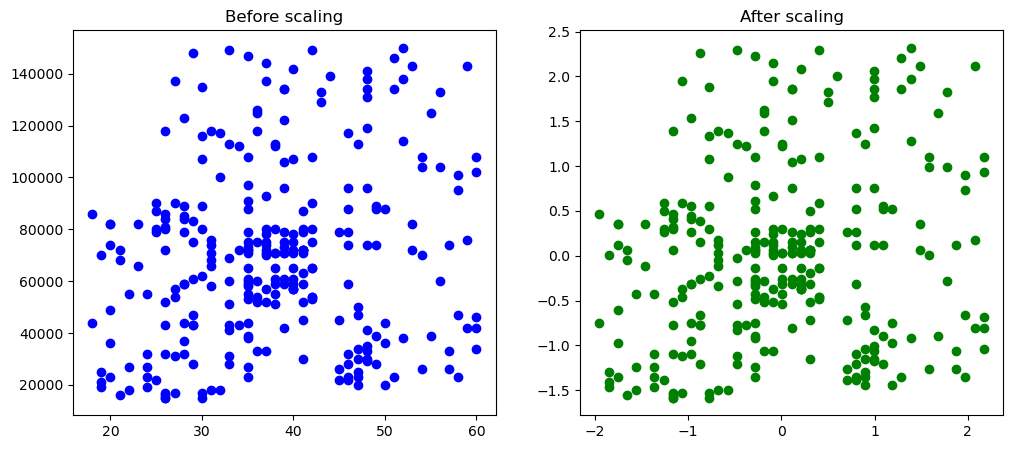

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], color='blue')
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='green')
ax2.set_title('After scaling')
plt.show()

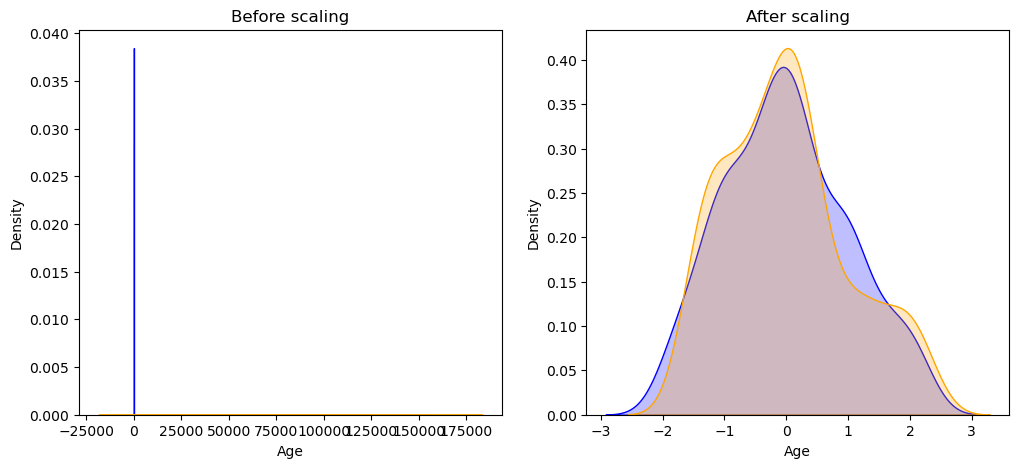

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'], ax=ax1, color='blue', fill=True)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, color='orange', fill=True)

#after scaling
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, color='blue', fill=True)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, color='orange', fill=True)
plt.show()

COMPARISON OF DISTRIBUTIONS

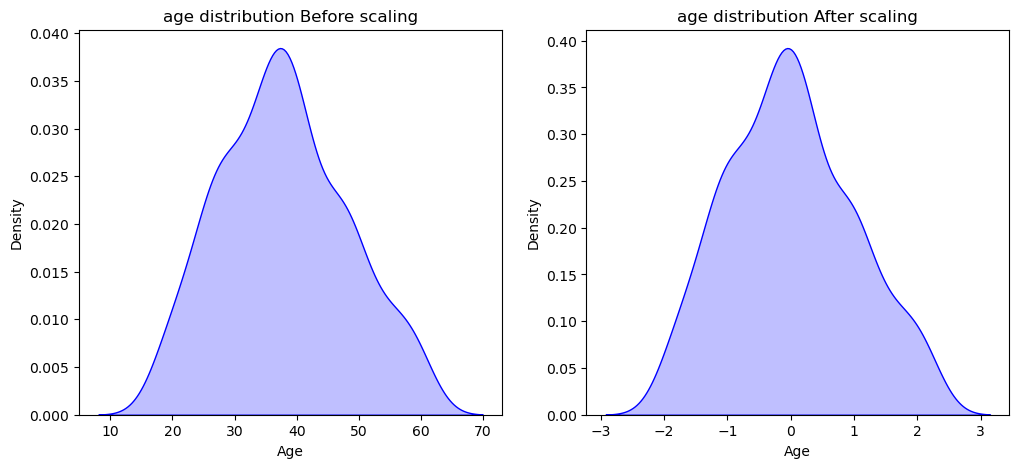

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('age distribution Before scaling')
sns.kdeplot(X_train['Age'], ax=ax1, color='blue', fill=True)
#after scaling
ax2.set_title('age distribution After scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, color='blue', fill=True)
plt.show()

why scaling is important

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr_scaled = LogisticRegression()
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [15]:
from sklearn.metrics import accuracy_score
print("Accuracy without scaling:", accuracy_score(y_test, y_pred))
print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))

Accuracy without scaling: 0.6583333333333333
Accuracy with scaling: 0.8666666666666667


EFFECT OF OUTLIERS

In [16]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [17]:
import pandas as pd

new_df = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [10000, 250000, 350000],
    'Purchased': [0, 1, 1]

})

df = pd.concat([df, new_df], ignore_index=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,10000,0
401,90,250000,1


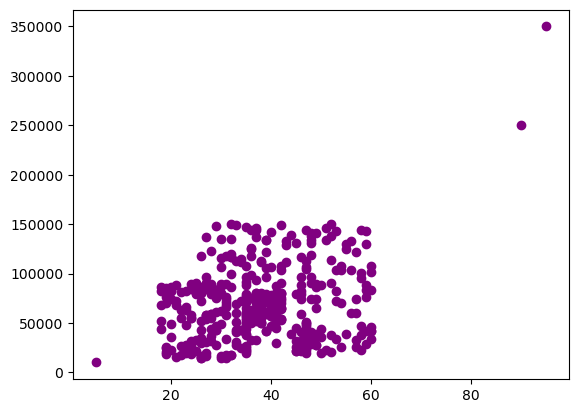

In [18]:
plt.scatter(df['Age'], df['EstimatedSalary'], color='purple')

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size = 0.3,random_state = 0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

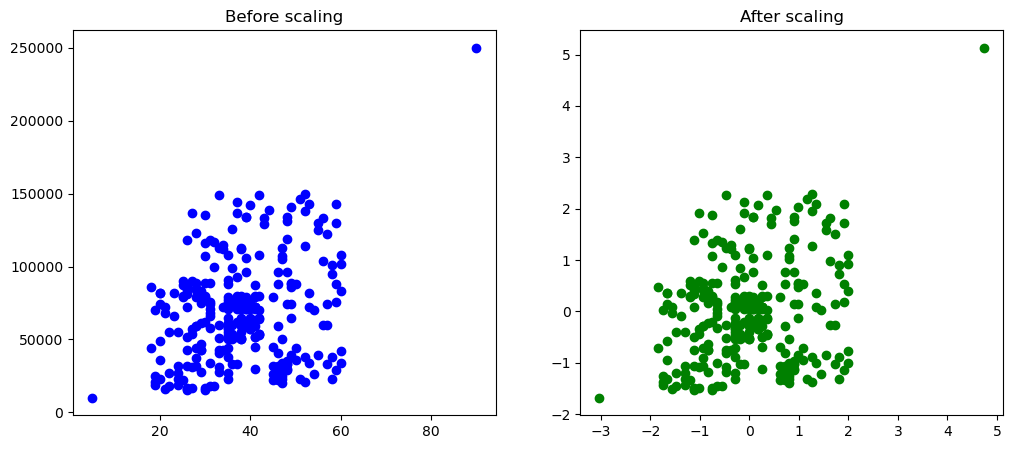

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], color='blue')
ax1.set_title('Before scaling')
#after scaling
ax2.scatter(X_train_scaled[:,0], X_train_scaled[:,1], color='green')
ax2.set_title('After scaling')
plt.show()